Dataset taken from:- https://commonslibrary.parliament.uk/research-briefings/cbp-8647/

Import libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset

In [147]:
dataset=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/UK-Parlimentary-Elections/main/1918-2019election_results-.csv", encoding="ISO-8859-1")
dataset.head(3)

,constituency_id,seats,constituency,country/region,electorate,con_votes,con_share,lib_votes,lib_share,lab_votes,lab_share,natSW_votes,natSW_share,oth_votes,oth_share,total_votes,turnout,election,boundary_set
0,1,1,BATTERSEA NORTH,London,38552,NaN,NaN,NaN,NaN,5634,0.334,NaN,NaN,11231.0,0.666,16865,0.437,1918,1918-35
1,2,1,BATTERSEA SOUTH,London,43036,15670.0,0.682,2273,0.099,3383,0.147,NaN,NaN,1657.0,0.072,22983,0.534,1918,1918-35
2,3,1,BERMONDSEY ROTHERHITHE,London,25008,5639.0,0.500,3889,0.345,1750,0.155,NaN,NaN,NaN,NaN,11278,0.451,1918,1918-35


Check for null values in dataset

In [148]:
dataset.isnull().sum()

constituency_id      221
seats                  0
constituency           0
country/region         0
electorate            75
con_votes           1113
con_share           1314
lib_votes           5277
lib_share           5317
lab_votes           1276
lab_share           1328
natSW_votes        16102
natSW_share        16102
oth_votes           9705
oth_share           9762
total_votes           24
turnout              345
election               0
boundary_set           0
dtype: int64

Rename column

In [149]:
dataset.rename(columns={'lib_votes ': 'lib_votes', 'turnout ':'turnout'}, inplace=True)

In [150]:
dataset.columns

Index(['constituency_id', 'seats', 'constituency', 'country/region',
       'electorate', 'con_votes', 'con_share', 'lib_votes', 'lib_share',
       'lab_votes', 'lab_share', 'natSW_votes', 'natSW_share', 'oth_votes',
       'oth_share', 'total_votes', 'turnout', 'election', 'boundary_set'],
      dtype='object')

Add natSW_votes to oth_votes

In [151]:
dataset.natSW_votes = dataset.natSW_votes + dataset.oth_votes

In [152]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   constituency_id  17477 non-null  object 
 1   seats            17698 non-null  int64  
 2   constituency     17698 non-null  object 
 3   country/region   17698 non-null  object 
 4   electorate       17623 non-null  object 
 5   con_votes        16585 non-null  float64
 6   con_share        16384 non-null  float64
 7   lib_votes        12421 non-null  object 
 8   lib_share        12381 non-null  float64
 9   lab_votes        16422 non-null  object 
 10  lab_share        16370 non-null  float64
 11  natSW_votes      874 non-null    float64
 12  natSW_share      1596 non-null   float64
 13  oth_votes        7993 non-null   float64
 14  oth_share        7936 non-null   object 
 15  total_votes      17674 non-null  object 
 16  turnout          17353 non-null  float64
 17  election    

Create new dataset

In [153]:
seats = dataset.seats
seats

0        1
1        1
2        1
3        1
4        1
        ..
17693    1
17694    1
17695    1
17696    1
17697    1
Name: seats, Length: 17698, dtype: int64

In [154]:
constituency = dataset.constituency
constituency

0                   BATTERSEA NORTH
1                   BATTERSEA SOUTH
2            BERMONDSEY ROTHERHITHE
3        BERMONDSEY WEST BERMONDSEY
4          BETHNAL GREEN NORTH EAST
                    ...            
17693             Thirsk and Malton
17694                     Wakefield
17695          Wentworth and Dearne
17696                  York Central
17697                    York Outer
Name: constituency, Length: 17698, dtype: object

In [155]:
region = dataset['country/region']
region

0                          London
1                          London
2                          London
3                          London
4                          London
                   ...           
17693    Yorkshire and The Humber
17694    Yorkshire and The Humber
17695    Yorkshire and The Humber
17696    Yorkshire and The Humber
17697    Yorkshire and The Humber
Name: country/region, Length: 17698, dtype: object

In [156]:
dataset['electorate'][699] = np.NaN
dataset['electorate'][3079] = np.NaN
dataset['electorate'][3674] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [157]:
electorate = dataset['electorate'].str[:5]
electorate = electorate
electorate = electorate.astype(float)
electorate

0        38552.0
1        43036.0
2        25008.0
3        23100.0
4        25253.0
          ...   
17693    80991.0
17694    70192.0
17695    74536.0
17696    74899.0
17697    74673.0
Name: electorate, Length: 17698, dtype: float64

In [158]:
con_votes = dataset.con_votes
con_votes

0            NaN
1        15670.0
2         5639.0
3            NaN
4            NaN
          ...   
17693    35634.0
17694    21283.0
17695    14577.0
17696    13767.0
17697    27324.0
Name: con_votes, Length: 17698, dtype: float64

In [159]:
dataset['lib_votes'][897] = np.NaN
dataset['lib_votes'][901] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
lib_votes = dataset.lib_votes
lib_votes = lib_votes.astype(float)
lib_votes

0           NaN
1        2273.0
2        3889.0
3        4260.0
4           NaN
          ...  
17693    6774.0
17694    1772.0
17695    1705.0
17696    4149.0
17697    9992.0
Name: lib_votes, Length: 17698, dtype: float64

In [161]:
dataset['lab_votes'][778] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
lab_votes = dataset.lab_votes
lab_votes = lab_votes.astype(float)
lab_votes

0         5634.0
1         3383.0
2         1750.0
3         1956.0
4            NaN
          ...   
17693    10480.0
17694    17925.0
17695    16742.0
17696    27312.0
17697    17339.0
Name: lab_votes, Length: 17698, dtype: float64

In [163]:
dataset.oth_share[4455] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
oth_votes = dataset.oth_votes
oth_votes

0        11231.0
1         1657.0
2            NaN
3         4292.0
4         7887.0
          ...   
17693     3700.0
17694     4047.0
17695     8533.0
17696     4277.0
17697      692.0
Name: oth_votes, Length: 17698, dtype: float64

In [165]:
dataset['total_votes'][699] = np.NaN
dataset['total_votes'][794] = np.NaN
dataset['total_votes'][1889] = np.NaN
dataset['total_votes'][2484] = np.NaN
dataset['total_votes'][3079] = np.NaN
dataset['total_votes'][4455] = np.NaN
dataset['total_votes'][4489] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [166]:
tot_votes = dataset.total_votes
tot_votes = tot_votes.astype(float)
tot_votes

0        16865.0
1        22983.0
2        11278.0
3        10508.0
4         7887.0
          ...   
17693    56588.0
17694    45027.0
17695    41557.0
17696    49505.0
17697    55347.0
Name: total_votes, Length: 17698, dtype: float64

In [167]:
year = dataset['election'].str[:4]
year = year.astype(float)
year

0        1918.0
1        1918.0
2        1918.0
3        1918.0
4        1918.0
          ...  
17693    2019.0
17694    2019.0
17695    2019.0
17696    2019.0
17697    2019.0
Name: election, Length: 17698, dtype: float64

In [168]:
turnout = dataset.turnout
turnout

0        0.437
1        0.534
2        0.451
3        0.455
4        0.312
         ...  
17693    0.699
17694    0.641
17695    0.558
17696    0.661
17697    0.741
Name: turnout, Length: 17698, dtype: float64

In [169]:
boundary_set = dataset.boundary_set
boundary_set

0        1918-35
1        1918-35
2        1918-35
3        1918-35
4        1918-35
          ...   
17693    2010-19
17694    2010-19
17695    2010-19
17696    2010-19
17697    2010-19
Name: boundary_set, Length: 17698, dtype: object

In [170]:
ds=pd.DataFrame({'seats': seats, 'constituency': constituency, 'region':region, 'electorate': electorate, 'con_votes':con_votes, 'lib_votes': lib_votes, 'lab_votes': lab_votes, 
                 'oth_votes': oth_votes, 'tot_votes': tot_votes, 'year': year, 'turnout': turnout, 'boundary_set':boundary_set})
ds

,seats,constituency,region,electorate,con_votes,lib_votes,lab_votes,oth_votes,tot_votes,year,turnout,boundary_set
0,1,BATTERSEA NORTH,London,38552.0,NaN,NaN,5634.0,11231.0,16865.0,1918.0,0.437,1918-35
1,1,BATTERSEA SOUTH,London,43036.0,15670.0,2273.0,3383.0,1657.0,22983.0,1918.0,0.534,1918-35
2,1,BERMONDSEY ROTHERHITHE,London,25008.0,5639.0,3889.0,1750.0,NaN,11278.0,1918.0,0.451,1918-35
3,1,BERMONDSEY WEST BERMONDSEY,London,23100.0,NaN,4260.0,1956.0,4292.0,10508.0,1918.0,0.455,1918-35
4,1,BETHNAL GREEN NORTH EAST,London,25253.0,NaN,NaN,NaN,7887.0,7887.0,1918.0,0.312,1918-35
...,...,...,...,...,...,...,...,...,...,...,...,...
17693,1,Thirsk and Malton,Yorkshire and The Humber,80991.0,35634.0,6774.0,10480.0,3700.0,56588.0,2019.0,0.699,2010-19
17694,1,Wakefield,Yorkshire and The Humber,70192.0,21283.0,1772.0,17925.0,4047.0,45027.0,2019.0,0.641,2010-19
17695,1,Wentworth and Dearne,Yorkshire and The Humber,74536.0,14577.0,1705.0,16742.0,8533.0,41557.0,2019.0,0.558,2010-19
17696,1,York Central,Yorkshire and The Humber,74899.0,13767.0,4149.0,27312.0,4277.0,49505.0,2019.0,0.661,2010-19


In [171]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seats         17698 non-null  int64  
 1   constituency  17698 non-null  object 
 2   region        17698 non-null  object 
 3   electorate    17620 non-null  float64
 4   con_votes     16585 non-null  float64
 5   lib_votes     12419 non-null  float64
 6   lab_votes     16421 non-null  float64
 7   oth_votes     7993 non-null   float64
 8   tot_votes     17667 non-null  float64
 9   year          17698 non-null  float64
 10  turnout       17353 non-null  float64
 11  boundary_set  17698 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 1.6+ MB


In [172]:
winner = ds[['con_votes','lib_votes', 'lab_votes', 'oth_votes']].idxmax(axis=1)
winner

0        oth_votes
1        con_votes
2        con_votes
3        oth_votes
4        oth_votes
           ...    
17693    con_votes
17694    con_votes
17695    lab_votes
17696    lab_votes
17697    con_votes
Length: 17698, dtype: object

Check for null values

In [173]:
winner.isnull().sum()

2

In [174]:
ds.isnull().sum()

seats              0
constituency       0
region             0
electorate        78
con_votes       1113
lib_votes       5279
lab_votes       1277
oth_votes       9705
tot_votes         31
year               0
turnout          345
boundary_set       0
dtype: int64

Impute null values

In [175]:
winner.fillna('oth_votes',inplace=True)

In [176]:
winner.isnull().sum()

0

In [177]:
for column in ds.columns:
    ds[column].fillna(ds[column].mode()[0], inplace=True)

In [178]:
ds.isnull().sum().sum()

0

Map dictionary  -  {'con_votes':1, 'lib_votes':2, 'lab_votes':3, 'oth_votes':5}

In [179]:
party = {'con_votes':1, 'lib_votes':2, 'lab_votes':3, 'oth_votes':4}
winner = winner.map(party)
winner

0        4
1        1
2        1
3        4
4        4
        ..
17693    1
17694    1
17695    3
17696    3
17697    1
Length: 17698, dtype: int64

Print off list of object columns

In [180]:
ds.dtypes[ds.dtypes != 'int64'][ds.dtypes != 'float64']

constituency    object
region          object
boundary_set    object
dtype: object

Ordinal encode

In [181]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

ds.constituency = enc.fit_transform(ds.constituency.values.reshape(-1,1))
ds.region = enc.fit_transform(ds['region'].values.reshape(-1,1))
ds.boundary_set = enc.fit_transform(ds.boundary_set.values.reshape(-1,1))

In [182]:
ds

,seats,constituency,region,electorate,con_votes,lib_votes,lab_votes,oth_votes,tot_votes,year,turnout,boundary_set
0,1,134.0,4.0,38552.0,-1.0,-1.0,5634.0,11231.0,16865.0,1918.0,0.437,0.0
1,1,135.0,4.0,43036.0,15670.0,2273.0,3383.0,1657.0,22983.0,1918.0,0.534,0.0
2,1,175.0,4.0,25008.0,5639.0,3889.0,1750.0,-1.0,11278.0,1918.0,0.451,0.0
3,1,176.0,4.0,23100.0,-1.0,4260.0,1956.0,4292.0,10508.0,1918.0,0.455,0.0
4,1,190.0,4.0,25253.0,-1.0,-1.0,-1.0,7887.0,7887.0,1918.0,0.312,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17693,1,2723.0,15.0,80991.0,35634.0,6774.0,10480.0,3700.0,56588.0,2019.0,0.699,10.0
17694,1,2932.0,15.0,70192.0,21283.0,1772.0,17925.0,4047.0,45027.0,2019.0,0.641,10.0
17695,1,2951.0,15.0,74536.0,14577.0,1705.0,16742.0,8533.0,41557.0,2019.0,0.558,10.0
17696,1,3032.0,15.0,74899.0,13767.0,4149.0,27312.0,4277.0,49505.0,2019.0,0.661,10.0


Graphical analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


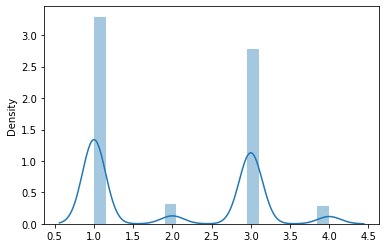

In [183]:
sns.distplot(winner)

In [184]:
import collections
from collections import Counter

counter = Counter(winner)
for k,v in counter.items():
	per = v / len(winner) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=4, Count=755, Percentage=4.266%
Class=1, Count=8745, Percentage=49.412%
Class=3, Count=7376, Percentage=41.677%
Class=2, Count=822, Percentage=4.645%


In [185]:
print(Counter(winner))

Counter({1: 8745, 3: 7376, 2: 822, 4: 755})


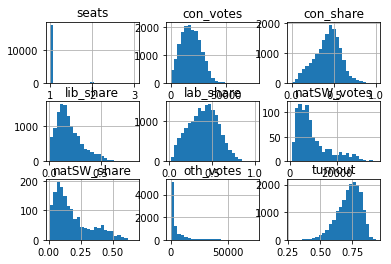

In [186]:
#create histograms of classes
# create histograms of all variables
from pandas import read_csv
from matplotlib import pyplot

# create a histogram plot of each variable
dataset.hist(bins=25)
# show the plot
pyplot.show()

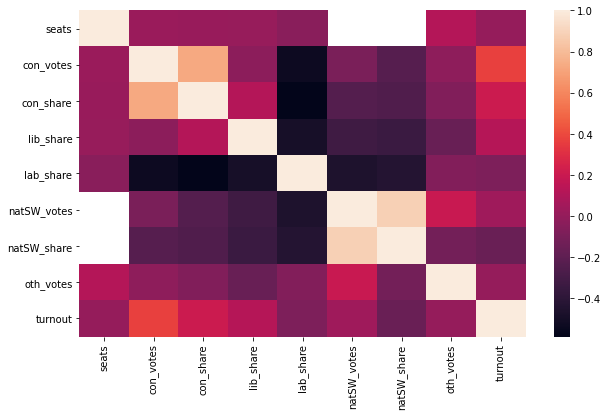

In [187]:
#create a heatmap to correlate promotion
plt.figure(figsize=(10,6))
cmap=dataset.corr()
sns.heatmap(cmap)

Define X and y

In [188]:
y = winner
X = ds

In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seats         17698 non-null  int64  
 1   constituency  17698 non-null  float64
 2   region        17698 non-null  float64
 3   electorate    17698 non-null  float64
 4   con_votes     17698 non-null  float64
 5   lib_votes     17698 non-null  float64
 6   lab_votes     17698 non-null  float64
 7   oth_votes     17698 non-null  float64
 8   tot_votes     17698 non-null  float64
 9   year          17698 non-null  float64
 10  turnout       17698 non-null  float64
 11  boundary_set  17698 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.6 MB


Visualise PCA

In [190]:
X.isnull().sum()

seats           0
constituency    0
region          0
electorate      0
con_votes       0
lib_votes       0
lab_votes       0
oth_votes       0
tot_votes       0
year            0
turnout         0
boundary_set    0
dtype: int64

In [191]:
for column in dataset.columns:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

In [192]:
X.isnull().sum().sum()

0

In [193]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X) # normalizing the features
X.shape

(17698, 12)

In [194]:
np.mean(X),np.std(X)

(1.0706185041776474e-16, 1.0)

In [195]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11']

In [196]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11
0,-0.090718,-1.548895,-0.878295,-1.189375,-1.764983,-0.985204,-1.135973,1.411395,-1.801890,-1.606358,-3.240701,-1.388887
1,-0.090718,-1.547754,-0.878295,-0.910883,-0.141107,-0.598814,-1.389369,-0.096865,-1.354565,-1.606358,-2.151689,-1.388887
2,-0.090718,-1.502133,-0.878295,-2.030564,-1.180549,-0.324229,-1.573196,-0.358061,-2.210391,-1.606358,-3.083524,-1.388887
3,-0.090718,-1.500992,-0.878295,-2.149066,-1.764983,-0.261189,-1.550006,0.318245,-2.266690,-1.606358,-3.038617,-1.388887
4,-0.090718,-1.485024,-0.878295,-2.015348,-1.764983,-0.985204,-1.770307,0.884591,-2.458328,-1.606358,-4.644068,-1.388887
...,...,...,...,...,...,...,...,...,...,...,...,...
17693,-0.090718,1.403983,1.736710,1.446423,1.927624,0.165981,-0.590457,0.224983,1.102506,1.609975,-0.299245,1.646645
17694,-0.090718,1.642358,1.736710,0.775719,0.440529,-0.683942,0.247630,0.279649,0.257209,1.609975,-0.950407,1.646645
17695,-0.090718,1.664028,1.736710,1.045516,-0.254367,-0.695326,0.114459,0.986360,0.003496,1.609975,-1.882243,1.646645
17696,-0.090718,1.756412,1.736710,1.068061,-0.338301,-0.280050,1.304328,0.315882,0.584623,1.609975,-0.725869,1.646645


In [197]:
from sklearn.decomposition import PCA

pca_uk = PCA(n_components=2)
principalComponents_uk = pca_uk.fit_transform(X)

In [198]:
principal_uk_Df = pd.DataFrame(data = principalComponents_uk, columns = ['principal component 1', 'principal component 2'])
principal_uk_Df

,principal component 1,principal component 2
0,3.714466,2.944004
1,2.861629,0.952381
2,4.107703,2.016915
3,4.343205,2.486083
4,4.576590,3.807413
...,...,...
17693,-3.089962,0.308031
17694,-1.941641,1.509554
17695,-1.704623,2.683838
17696,-2.317053,1.416013


In [199]:
print('Explained variation per principal component: {}'.format(pca_uk.explained_variance_ratio_))

Explained variation per principal component: [0.30070743 0.15452588]


In [200]:
party = {1:'con_votes', 2:'lib_votes', 3:'lab_votes', 4:'oth_votes'}
winner = winner.map(party)
y = winner
y

0        oth_votes
1        con_votes
2        con_votes
3        oth_votes
4        oth_votes
           ...    
17693    con_votes
17694    con_votes
17695    lab_votes
17696    lab_votes
17697    con_votes
Length: 17698, dtype: object

<Figure size 432x288 with 0 Axes>

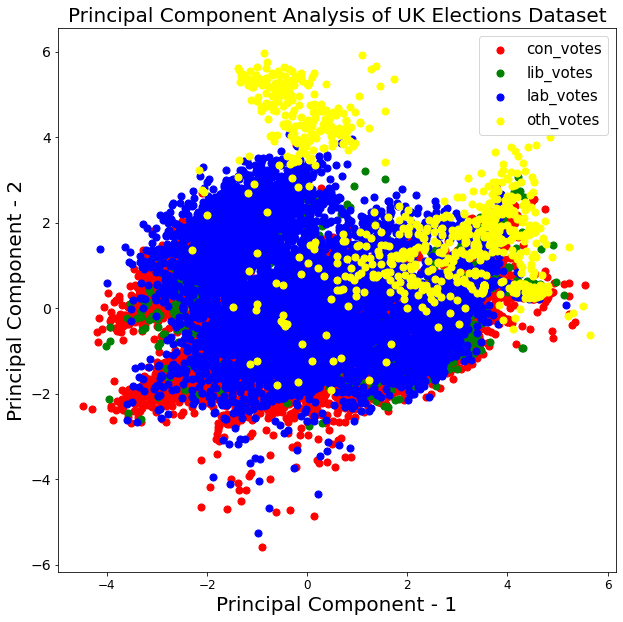

In [201]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of UK Elections Dataset",fontsize=20)
targets = ['con_votes', 'lib_votes', 'lab_votes', 'oth_votes']
colors = ['r', 'g', 'blue', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    plt.scatter(principal_uk_Df.loc[indicesToKeep, 'principal component 1'], 
                principal_uk_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [202]:
pca_uk = PCA(n_components=12)
principalComponents_uk = pca_uk.fit_transform(X)

Split X up for training and testing

In [203]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((15928, 12), (1770, 12), (15928,), (1770,))

Select model

In [204]:
!pip install catboost

In [205]:
from catboost import Pool, CatBoostClassifier, cv

model = CatBoostClassifier(eval_metric='Accuracy',iterations=4000, random_seed=1, loss_function='MultiClass', class_weights= [.51, .96, .59, .95]).fit(X_train,y_train)
print(model.score(X_train, y_train))

Learning rate set to 0.028242
0:	learn: 0.8775868	total: 24.9ms	remaining: 1m 39s
1:	learn: 0.8831567	total: 44.3ms	remaining: 1m 28s
2:	learn: 0.8830721	total: 63.3ms	remaining: 1m 24s
3:	learn: 0.8879724	total: 81.7ms	remaining: 1m 21s
4:	learn: 0.8905612	total: 100ms	remaining: 1m 20s
5:	learn: 0.8903406	total: 119ms	remaining: 1m 19s
6:	learn: 0.8906850	total: 148ms	remaining: 1m 24s
7:	learn: 0.8934839	total: 167ms	remaining: 1m 23s
8:	learn: 0.8957073	total: 185ms	remaining: 1m 21s
9:	learn: 0.8967353	total: 206ms	remaining: 1m 22s
10:	learn: 0.9047824	total: 225ms	remaining: 1m 21s
11:	learn: 0.9047632	total: 245ms	remaining: 1m 21s
12:	learn: 0.9090304	total: 264ms	remaining: 1m 20s
13:	learn: 0.9102851	total: 282ms	remaining: 1m 20s
14:	learn: 0.9137781	total: 301ms	remaining: 1m 19s
15:	learn: 0.9149526	total: 320ms	remaining: 1m 19s
16:	learn: 0.9146797	total: 338ms	remaining: 1m 19s
17:	learn: 0.9171193	total: 357ms	remaining: 1m 18s
18:	learn: 0.9176495	total: 375ms	remain

Predict on validation set

In [206]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.9864406779661017


In [207]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
8563,con_votes,con_votes
5903,lab_votes,lab_votes
8640,con_votes,con_votes
10360,lab_votes,lab_votes
2833,con_votes,con_votes
...,...,...
10992,lab_votes,lab_votes
9196,lab_votes,lab_votes
3983,con_votes,con_votes
7651,con_votes,con_votes


In [208]:
party = {'con_votes':1, 'lib_votes':2, 'lab_votes':3, 'oth_votes':4}
df.Predicted = df.Predicted.map(party)
df.Predicted

8563     1
5903     3
8640     1
10360    3
2833     1
        ..
10992    3
9196     3
3983     1
7651     1
5314     1
Name: Predicted, Length: 1770, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


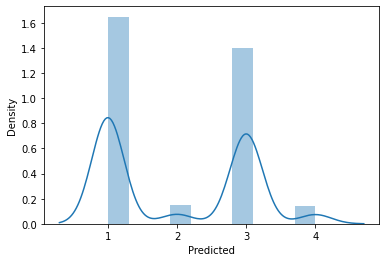

In [209]:
sns.distplot(df.Predicted)

In [210]:
print(Counter(df.Predicted))

Counter({1: 875, 3: 741, 2: 78, 4: 76})


Analyse years

In [211]:
ds['winner'] = winner
ds

,seats,constituency,region,electorate,con_votes,lib_votes,lab_votes,oth_votes,tot_votes,year,turnout,boundary_set,winner
0,1,134.0,4.0,38552.0,-1.0,-1.0,5634.0,11231.0,16865.0,1918.0,0.437,0.0,oth_votes
1,1,135.0,4.0,43036.0,15670.0,2273.0,3383.0,1657.0,22983.0,1918.0,0.534,0.0,con_votes
2,1,175.0,4.0,25008.0,5639.0,3889.0,1750.0,-1.0,11278.0,1918.0,0.451,0.0,con_votes
3,1,176.0,4.0,23100.0,-1.0,4260.0,1956.0,4292.0,10508.0,1918.0,0.455,0.0,oth_votes
4,1,190.0,4.0,25253.0,-1.0,-1.0,-1.0,7887.0,7887.0,1918.0,0.312,0.0,oth_votes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17693,1,2723.0,15.0,80991.0,35634.0,6774.0,10480.0,3700.0,56588.0,2019.0,0.699,10.0,con_votes
17694,1,2932.0,15.0,70192.0,21283.0,1772.0,17925.0,4047.0,45027.0,2019.0,0.641,10.0,con_votes
17695,1,2951.0,15.0,74536.0,14577.0,1705.0,16742.0,8533.0,41557.0,2019.0,0.558,10.0,lab_votes
17696,1,3032.0,15.0,74899.0,13767.0,4149.0,27312.0,4277.0,49505.0,2019.0,0.661,10.0,lab_votes


In [212]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seats         17698 non-null  int64  
 1   constituency  17698 non-null  float64
 2   region        17698 non-null  float64
 3   electorate    17698 non-null  float64
 4   con_votes     17698 non-null  float64
 5   lib_votes     17698 non-null  float64
 6   lab_votes     17698 non-null  float64
 7   oth_votes     17698 non-null  float64
 8   tot_votes     17698 non-null  float64
 9   year          17698 non-null  float64
 10  turnout       17698 non-null  float64
 11  boundary_set  17698 non-null  float64
 12  winner        17698 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 1.8+ MB


In [213]:
year = 2019

include = ds[ds['year'].values == year]
exclude = ds[ds['year'].values != year]
include

,seats,constituency,region,electorate,con_votes,lib_votes,lab_votes,oth_votes,tot_votes,year,turnout,boundary_set,winner
17048,1,380.0,0.0,69906.0,29590.0,3741.0,9178.0,1619.0,44128.0,2019.0,0.631,10.0,con_votes
17049,1,388.0,0.0,71581.0,20346.0,4608.0,20491.0,1856.0,47301.0,2019.0,0.661,10.0,lab_votes
17050,1,432.0,0.0,75208.0,34112.0,4779.0,9439.0,2169.0,50499.0,2019.0,0.671,10.0,con_votes
17051,1,437.0,0.0,75255.0,36308.0,7187.0,7243.0,2211.0,52949.0,2019.0,0.704,10.0,con_votes
17052,1,447.0,0.0,78151.0,33934.0,9195.0,12073.0,1775.0,56977.0,2019.0,0.729,10.0,con_votes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17693,1,2723.0,15.0,80991.0,35634.0,6774.0,10480.0,3700.0,56588.0,2019.0,0.699,10.0,con_votes
17694,1,2932.0,15.0,70192.0,21283.0,1772.0,17925.0,4047.0,45027.0,2019.0,0.641,10.0,con_votes
17695,1,2951.0,15.0,74536.0,14577.0,1705.0,16742.0,8533.0,41557.0,2019.0,0.558,10.0,lab_votes
17696,1,3032.0,15.0,74899.0,13767.0,4149.0,27312.0,4277.0,49505.0,2019.0,0.661,10.0,lab_votes


In [214]:
party = {'con_votes':1, 'lib_votes':2, 'lab_votes':3, 'oth_votes':4}
winner = winner.map(party)
winner

0        4
1        1
2        1
3        4
4        4
        ..
17693    1
17694    1
17695    3
17696    3
17697    1
Length: 17698, dtype: int64

In [215]:
total_con = include['con_votes'].sum()
total_con

13966439.0

In [216]:
total_lib = include['lib_votes'].sum()
total_lib

3696380.0

In [217]:
total_lab = include['lab_votes'].sum()
total_lab

10269032.0

In [218]:
total_oth = include['oth_votes'].sum()
total_oth

2686497.0